<a href="https://colab.research.google.com/github/ussalbt/Assignment/blob/main/DL_Assignment_3_(Time_Series_with_RNN_Product_Amount_Forecast_by_Time)tam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [2]:
df = pd.read_csv('/content/sample_data/Frozen_Dessert_Production.csv',
                index_col='DATE',
                parse_dates=True# datetime olması için 2 komut önemli
                )

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [5]:
df.columns = ['Production']

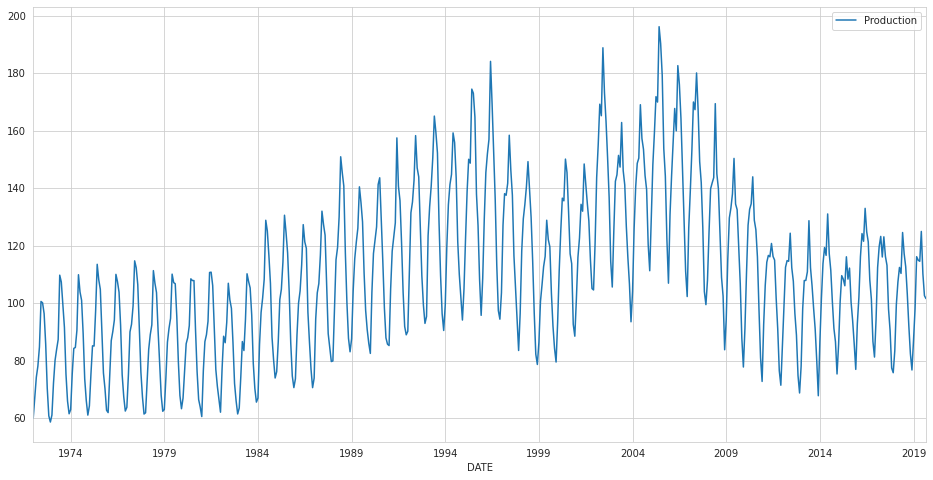

In [6]:
df.plot(figsize = (16,8));

# Preprocessing of Data

## Train Test Split

In [7]:
len(df)

573

In [11]:
test_size = 23

In [12]:
test_ind = len(df)-test_size
test_ind

550

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-06-01,123.087
2017-07-01,116.264
2017-08-01,113.172


In [15]:
test

,Production
DATE,
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584
2018-07-01,117.222


## Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 12
batch_size = 1#update ilgilendiriyor
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [22]:
len(generator)

538

In [23]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]), array([[0.01774221]]))

In [24]:
X, y = generator[0]

In [25]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [27]:
train_scaled.shape

(550, 1)

In [28]:
n_features = train_scaled.shape[1]

In [29]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))#return _sequences =True olunca 
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


EarlyStopping and Validation Generator

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [37]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [38]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
538/538 [==============================] - 13s 15ms/step - loss: 0.0218 - val_loss: 0.0137
Epoch 2/120
538/538 [==============================] - 7s 13ms/step - loss: 0.0052 - val_loss: 0.0036
Epoch 3/120
538/538 [==============================] - 7s 13ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 4/120
538/538 [==============================] - 7s 13ms/step - loss: 0.0045 - val_loss: 0.0068
Epoch 5/120
538/538 [==============================] - 10s 19ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 6/120
538/538 [==============================] - 7s 14ms/step - loss: 0.0038 - val_loss: 0.0028
Epoch 7/120
538/538 [==============================] - 7s 12ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 8/120
538/538 [==============================] - 7s 13ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 9/120
538/538 [==============================] - 7s 13ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 10/120
538/538 [==============================] - 7s 13ms/step - loss: 0.0

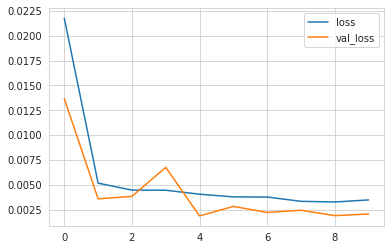

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

### Evaluation on Test Data

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [43]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [44]:
predictions_scaled

[array([0.20738763], dtype=float32),
 array([0.24583316], dtype=float32),
 array([0.30976158], dtype=float32),
 array([0.37048772], dtype=float32),
 array([0.4152112], dtype=float32),
 array([0.44100627], dtype=float32),
 array([0.44267064], dtype=float32),
 array([0.4197715], dtype=float32),
 array([0.36254445], dtype=float32),
 array([0.28895763], dtype=float32),
 array([0.21987975], dtype=float32),
 array([0.19264987], dtype=float32)]

In [45]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.4284340206955334 
mae: 0.07963570743609176 
mse: 0.007044405218049864 
rmse: 0.08393095506456401


### Inverse Transformation and Comparing

In [46]:
predictions = scaler.inverse_transform(predictions_scaled)

In [47]:
compare = test[:12]

In [48]:
compare['Predictions'] = predictions

In [49]:
compare

,Production,Predictions
DATE,,
2017-11-01,77.438,87.178
2017-12-01,75.812,92.465
2018-01-01,83.434,101.256
2018-02-01,99.490,109.607
2018-03-01,107.315,115.757
2018-04-01,112.431,119.304
2018-05-01,110.354,119.533
2018-06-01,124.584,116.384
2018-07-01,117.222,108.515


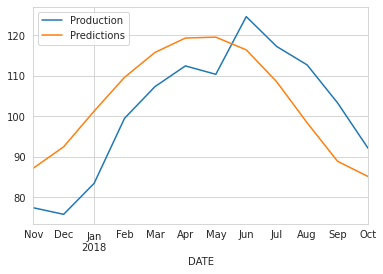

In [50]:
compare.plot();

In [53]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.4284340206955335 
mae: 10.951016708795976 
mse: 133.2102147537508 
rmse: 11.541672961652951


## with "relu" activation function

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [55]:
train_scaled.shape

(550, 1)

In [56]:
n_features = train_scaled.shape[1]

In [57]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))#return _sequences =True olunca 
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


### Evaluation on Test Data

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [61]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [62]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
538/538 [==============================] - 15s 19ms/step - loss: 0.0256 - val_loss: 0.0187
Epoch 2/120
538/538 [==============================] - 10s 18ms/step - loss: 0.0110 - val_loss: 0.0069
Epoch 3/120
538/538 [==============================] - 6s 12ms/step - loss: 0.0070 - val_loss: 0.0019
Epoch 4/120
538/538 [==============================] - 6s 12ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 5/120
538/538 [==============================] - 6s 12ms/step - loss: 0.0062 - val_loss: 0.0020
Epoch 6/120
538/538 [==============================] - 6s 12ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 7/120
538/538 [==============================] - 6s 12ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 8/120
538/538 [==============================] - 6s 12ms/step - loss: 0.0042 - val_loss: 0.0026


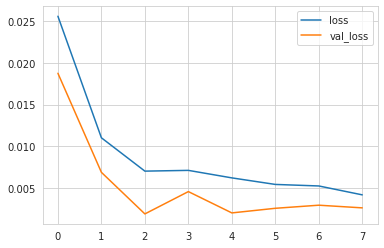

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

evaluation


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [66]:
predictions_scaled = []

In [67]:
first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [68]:
predictions_scaled

[array([0.18477799], dtype=float32),
 array([0.2232484], dtype=float32),
 array([0.31322145], dtype=float32),
 array([0.39291084], dtype=float32),
 array([0.43856296], dtype=float32),
 array([0.44206798], dtype=float32),
 array([0.45794803], dtype=float32),
 array([0.4655001], dtype=float32),
 array([0.43524536], dtype=float32),
 array([0.36136845], dtype=float32),
 array([0.22802716], dtype=float32),
 array([0.18143749], dtype=float32)]

In [69]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5272027724181241 
mae: 0.0672502379349982 
mse: 0.0058271054920207505 
rmse: 0.07633547990299629


### Inverse Transformation and Comparing

In [70]:
predictions = scaler.inverse_transform(predictions_scaled)

In [71]:
compare = test[:12]

In [72]:
compare['Predictions'] = predictions

In [73]:
compare

,Production,Predictions
DATE,,
2017-11-01,77.438,84.069
2017-12-01,75.812,89.360
2018-01-01,83.434,101.732
2018-02-01,99.490,112.691
2018-03-01,107.315,118.968
2018-04-01,112.431,119.450
2018-05-01,110.354,121.634
2018-06-01,124.584,122.673
2018-07-01,117.222,118.512


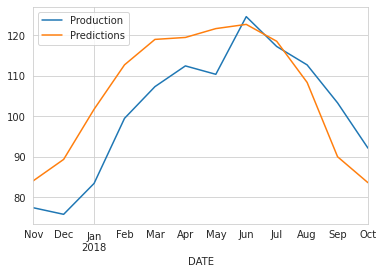

In [74]:
compare.plot();

In [75]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.5272027724181247 
mae: 9.247842494369543 
mse: 110.19098844511551 
rmse: 10.497189549832637


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [76]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [77]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [78]:
len(df)

573

In [79]:
len(generator)

561

In [80]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 13s 13ms/step - loss: 0.0184
Epoch 2/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0050
Epoch 3/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0044
Epoch 4/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0040
Epoch 5/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0040
Epoch 6/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0035
Epoch 7/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0036
Epoch 8/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0031
Epoch 9/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0034
Epoch 10/15
561/561 [==============================] - 8s 14ms/step - loss: 0.0033
Epoch 11/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0032
Epoch 12/15
561/561 [==============================] - 7s 13ms/step - loss: 0.0032
Epoch 13/15


In [81]:
scaled_full_data.shape

(573, 1)

In [82]:
scaled_full_data[-length:].shape

(12, 1)

In [83]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [84]:
forecast = scaler.inverse_transform(forecast)

In [85]:
forecast

array([[ 96.09726621],
       [ 95.5785241 ],
       [101.38531126],
       [109.20460569],
       [116.5156249 ],
       [122.67205696],
       [126.97005074],
       [128.80886257],
       [127.42511859],
       [122.81686804],
       [117.06308333],
       [112.28823959]])

In [86]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [87]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [88]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [89]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [90]:
forecast_df

,Forecast
2019-10-01,96.097
2019-11-01,95.579
2019-12-01,101.385
2020-01-01,109.205
2020-02-01,116.516
2020-03-01,122.672
2020-04-01,126.970
2020-05-01,128.809
2020-06-01,127.425
2020-07-01,122.817


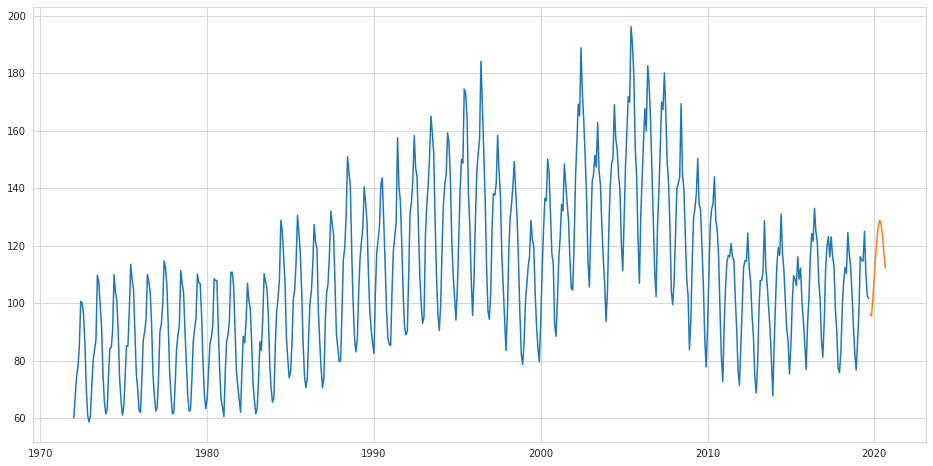

In [92]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast']);

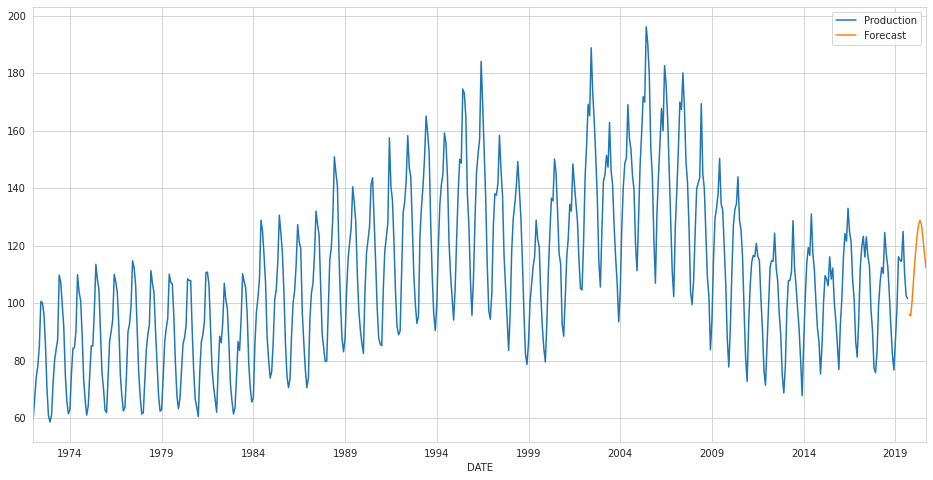

In [93]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(564.0, 609.0)

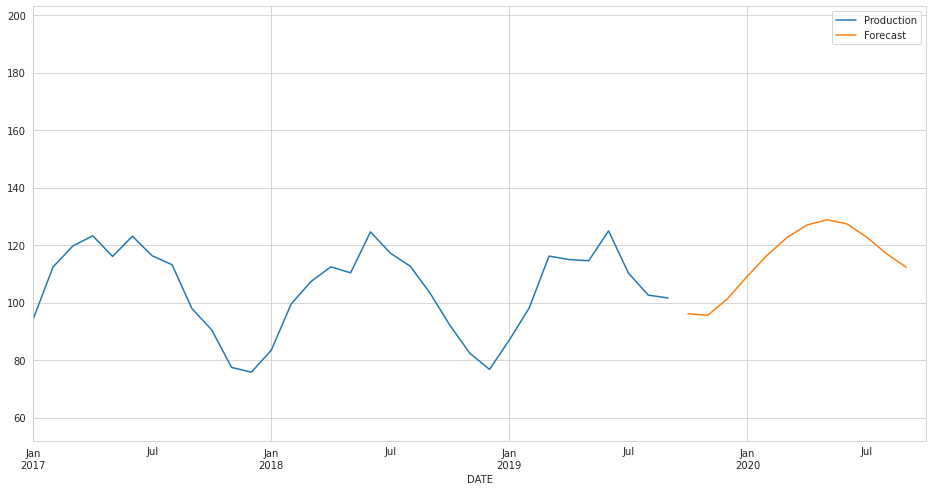

In [98]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01', '2020-10-01')

In [100]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)

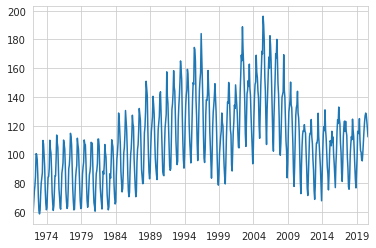

In [101]:
dataset_total.plot();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___